In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os 
import sys

sys.path.append('../../boxcox')
sys.path.append('../../comparison')
sys.path.append('../../dCor')
sys.path.append('../../local_maximal_corr')
sys.path.append('../../MCI')

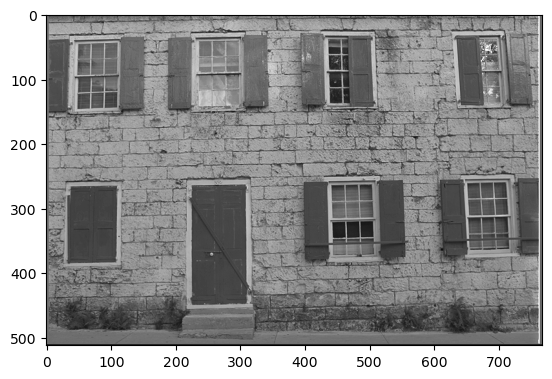

In [2]:
from box_cox_img import BoxCoxImg
import matplotlib.pyplot as plt

img_path = '../../boxcox/img/1.png'
BCI = BoxCoxImg(img_path)

full_bc, lam_full = BCI.transform()
plt.imshow(full_bc, cmap='gray')

In [3]:
from img_comparison import compare_images

from scipy.spatial import distance
from main_lmc import LocalMaximalCorr
from minepy import MINE

from scipy.stats import pearsonr



lams = np.linspace(-5, 5, 100)
dcors_results = []
corrs_results = []
lmc_results = []
mics_results = []
tics_results = []

In [4]:
x = np.linspace(0,1,1000)
y = np.sin(12*x)/2 + 0.5

MINE(alpha=0.6, c=15, est="mic_e").compute_score(x, y)

In [5]:
from tqdm import tqdm

lams = np.linspace(-1, 5, 60)

for lam in tqdm(lams):
    # multiplot img and hist
    bw_img = BCI.bw_img
    bc_img = BCI.transform(lam=lam) 
    comp = compare_images(bw_img, bc_img)
    method = 'full'

    # dcor
    dcor = lambda x, y: distance.correlation(x, y)
    dcors_results.append(comp.compare_images(function=dcor, comparison_method= method))

    # # lmc
    # lmc = lambda x, y: LocalMaximalCorr(x, y).local_maximal_corr()[0]
    # lmc_results.append(comp.compare_images(function=lmc, comparison_method= method))

    # mic
    def mic(x, y):
        m = MINE(alpha=0.6, c=15, est="mic_e")
        m.compute_score(x, y)
        return m.mic()
    
    mic_e = lambda x, y:  mic(x, y)
    mics_results.append(comp.compare_images(function=mic_e, comparison_method= method))

    # tic
    def tic(x, y):
        m = MINE(alpha=0.6, c=15, est="mic_e")
        m.compute_score(x, y)
        return m.tic()
    tic_e = lambda x, y:  tic(x, y)
    tics_results.append(comp.compare_images(function=tic_e, comparison_method= method))


    # corr
    corr = lambda x, y: pearsonr(x, y)[0]
    corrs_results.append(comp.compare_images(function=corr, comparison_method= method))


100%|██████████| 60/60 [1:10:37<00:00, 70.62s/it]


In [6]:

# save results to csv 
df = pd.DataFrame()
df['lam'] = lams
df['dcor'] = dcors_results
df['mic'] = mics_results
df['tic'] = tics_results
df['corr'] = corrs_results
df.to_csv('./results.csv')


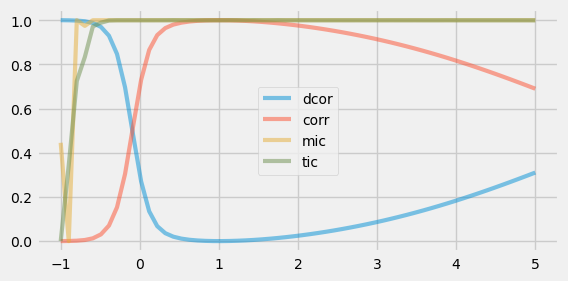

In [10]:

# plot all the results in different colors
normalize = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))
plt.plot(lams, normalize(dcors_results), label='dcor', alpha=0.5)
plt.plot(lams, normalize(corrs_results), label='corr', alpha=0.5)
# plt.plot(lams, normalize(lmc_results), label='lmc', alpha=0.5)
plt.plot(lams, normalize(mics_results), label='mic', alpha=0.5)
plt.plot(lams, normalize(tics_results), label='tic', alpha=0.5)
plt.legend()
plt.show()
